<a href="https://colab.research.google.com/github/hfelizzola/Curso-Fundamentos-Ciencia-de-Datos-Fontebo/blob/main/4_Modelos_Predictivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos Predictivos
### Curso de Ciencia de Datos


## Cargar librerías

In [1]:
# Librerías: procesamiento y análisis de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Librerías: modelos predictivos

# Muestreo y preprocesamiento
from sklearn.model_selection import train_test_split

# Modelos de regresión
from sklearn.linear_model import LinearRegression

# Modelos de clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# Evaluación de modelos
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

# Configuración de pandas
pd.set_option('display.max_columns',None)

## Configurar la carpeta de almacenamiento de datos

In [2]:
# Para conectarse con google drive
from google.colab import drive
drive.mount('/gdrive')
# Configurar directorio de trabajo
os.chdir('/gdrive/MyDrive/Colab Notebooks')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Carga de datos

In [3]:
# Cargar datos del archivo gastos_medicos.xlsx
datos = pd.read_excel('gastos_medicos.xlsx')
# Mostrar los primeros 5 registros
datos.head(5)

,sexo,edad,hijos,region,imc,fumador,gastos
0,mujer,19,0,suroccidente,27.900,si,16884.92
1,hombre,18,1,suroriente,33.770,no,1725.55
2,hombre,28,3,suroriente,33.000,no,4449.46
3,hombre,33,0,noroccidente,22.705,no,21984.47
4,hombre,32,0,noroccidente,28.880,no,3866.86


## Análisis Exploratorio

In [4]:
# Resumen estadístico
datos.describe()

,edad,hijos,imc,gastos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.094918,30.663397,13270.422280
std,14.049960,1.205493,6.098187,12110.011272
min,18.000000,0.000000,15.960000,1121.870000
25%,27.000000,0.000000,26.296250,4740.287500
50%,39.000000,1.000000,30.400000,9382.030000
75%,51.000000,2.000000,34.693750,16639.915000
max,64.000000,5.000000,53.130000,63770.430000


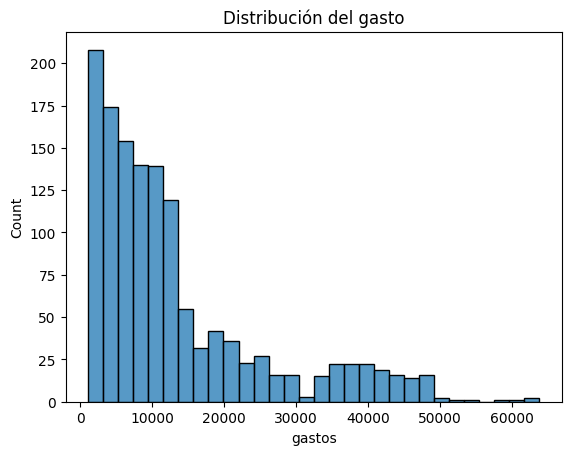

In [5]:
# Distribución del gasto
sns.histplot(datos['gastos'])
plt.title('Distribución del gasto')
plt.show()

In [6]:
# Resumen por sexo
datos['sexo'].value_counts()

sexo
hombre    676
mujer     662
Name: count, dtype: int64

In [7]:
# Resumen por fumador
datos['fumador'].value_counts()

fumador
no    1064
si     274
Name: count, dtype: int64

In [8]:
# Resumen por región
datos['region'].value_counts()

region
suroriente      364
suroccidente    325
noroccidente    325
nororiente      324
Name: count, dtype: int64

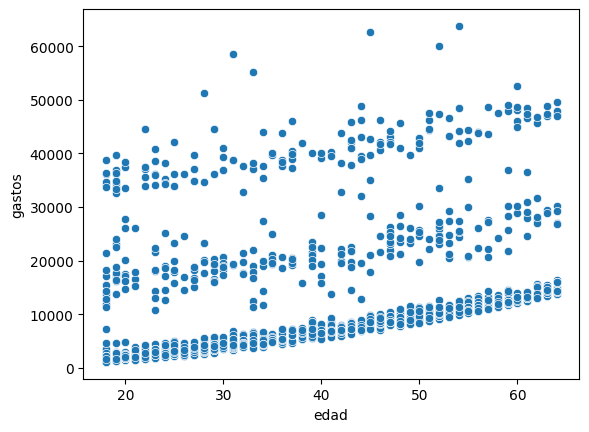

In [9]:
# Gráfico: edad vs gastos
sns.scatterplot(x='edad',y='gastos',data=datos)
plt.show()

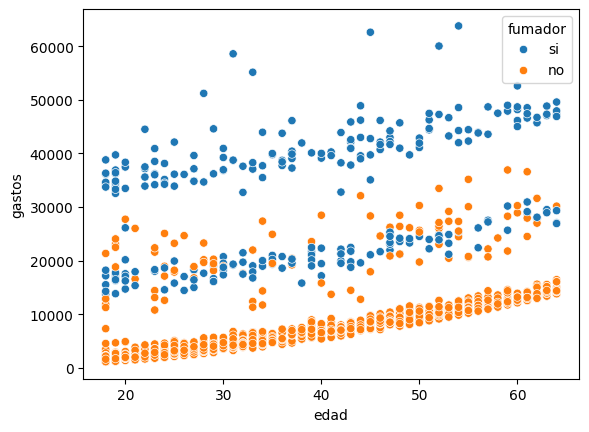

In [10]:
# Gráfico: edad vs gastos
sns.scatterplot(x='edad',y='gastos',data=datos, hue='fumador')
plt.show()

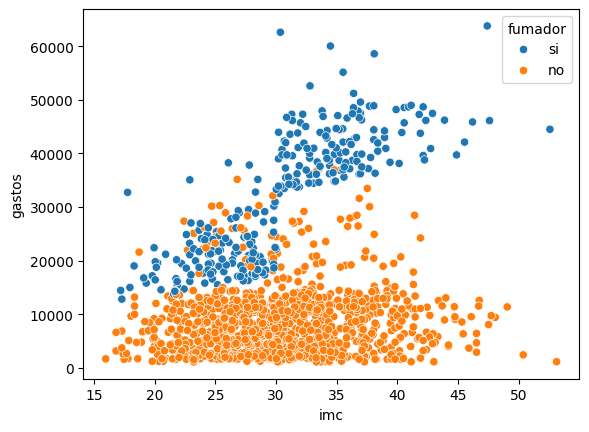

In [11]:
# Gráfico: imc vs gastos
sns.scatterplot(x='imc',y='gastos',data=datos, hue='fumador')
plt.show()

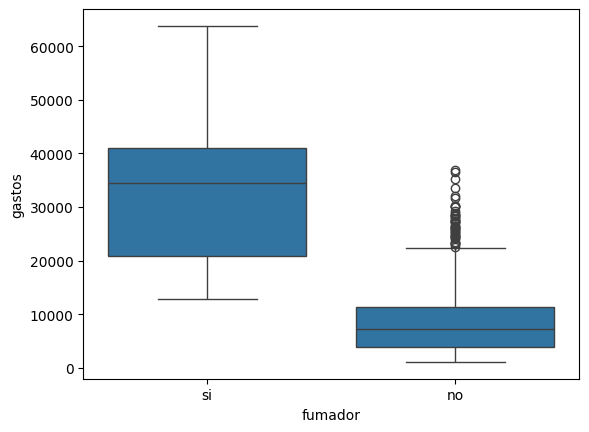

In [12]:
# Gráfico: gastos vs fumador
sns.boxplot(x='fumador',y='gastos',data=datos)
plt.show()

## Modelo de Regresión Lineal

### 1. Preprocesamiento de los datos

In [13]:
# Dividir variables independientes (Xs) de variable dependiente (Y)
X = datos.drop('gastos',axis=1)
y = datos['gastos']


### Normalizar variables numéricas

Para normalizar las variables numéricas se utiliza la siguiente formula:

$$
\text{Variable Normalizada} = \frac{\text{Variable} - \text{Promedio}}{\text{Desv. Estándar}}
$$

In [14]:
# Normalizar la edad
X['edad'] = (X['edad'] - X['edad'].mean()) / X['edad'].std()
# Normalizar el imc
X['imc'] = (X['imc'] - X['imc'].mean()) / X['imc'].std()
# Normalizar número de hijos
X['hijos'] = (X['hijos'] - X['hijos'].mean()) / X['hijos'].std()

### Variables dummies

In [15]:
# Generar variables dummies
X = pd.get_dummies(X, drop_first=True, dtype=int)
X.head()

,edad,hijos,imc,sexo_mujer,region_nororiente,region_suroccidente,region_suroriente,fumador_si
0,-1.438227,-0.908274,-0.453151,1,0,1,0,1
1,-1.509401,-0.078738,0.509431,0,0,0,1,0
2,-0.797655,1.580335,0.383164,0,0,0,1,0
3,-0.441782,-0.908274,-1.305043,0,0,0,0,0
4,-0.512957,-0.908274,-0.292447,0,0,0,0,0


### 2. División train - test

In [16]:
# Dividir train/test (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### 3. Entrenar modelo de regresión

In [17]:
# Crear el modelo de regresión
modelo_rl = LinearRegression()
# Entrenar el modelo
modelo_rl.fit(X_train, y_train)

LinearRegression()

In [18]:
#  Mostrar los coeficientes del modelo en un dataframe
coeficientes = pd.DataFrame({'variable':X_train.columns, 'coeficiente':modelo_rl.coef_})
coeficientes

,variable,coeficiente
0,edad,3619.589149
1,hijos,575.432171
2,imc,2124.764041
3,sexo_mujer,93.428041
4,region_nororiente,561.187803
5,region_suroccidente,-564.862978
6,region_suroriente,-507.430816
7,fumador_si,23723.599545


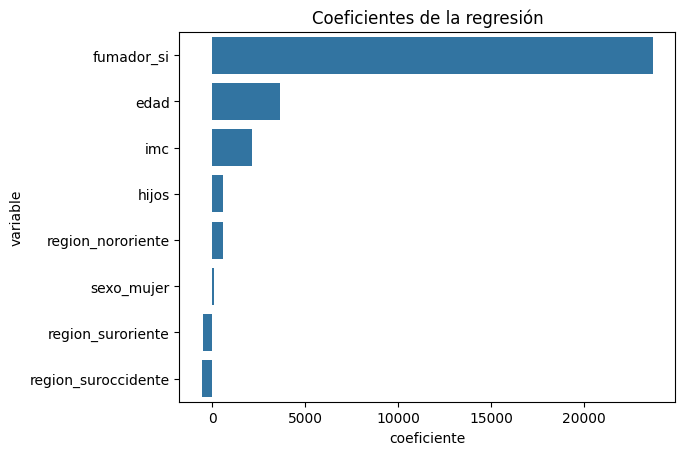

In [19]:
# Grafica: coeficientes de la regresión de mayor a menor
sns.barplot(x='coeficiente', y='variable', data=coeficientes.sort_values(by='coeficiente', ascending=False))
plt.title('Coeficientes de la regresión')
plt.show()


### Análisis de la Tabla de Coeficientes de la Regresión
La tabla muestra los coeficientes de cada variable en el modelo de regresión. A continuación, se presenta un análisis breve para cada variable:

**fumador_si:**

- Coeficiente: 23723
- Interpretación: Ser fumador incrementa los gastos médicos en aproximadamente 23,723 unidades monetarias. Este es, con diferencia, el coeficiente más alto, indicando que fumar es el factor que más influye en los gastos médicos.

**edad:**
- Coeficiente: 3619.59
- Interpretación: Cada año adicional de edad aumenta los gastos médicos en 3619.59 unidades monetarias. La edad es una variable importante que incrementa los gastos médicos.

**imc:**
- Coeficiente: 2124.76
- Interpretación: Cada unidad adicional en el IMC se asocia con un aumento de 2124.76 unidades monetarias en los gastos médicos, indicando que un mayor IMC está relacionado con mayores costos médicos.

**region_nororiente:**
- Coeficiente: 561.19
- Interpretación: Vivir en la región nororiente incrementa los gastos médicos en 561.19 unidades monetarias en comparación con la región de referencia.

**hijos:**
- Coeficiente: 575.4
- Interpretación: Cada hijo adicional incrementa los gastos médicos en 575.4 unidades monetarias. Este impacto es relativamente pequeño.

**sexo_mujer:**
- Coeficiente: 93.43
- Interpretación: Ser mujer aumenta los gastos médicos en 93.43 unidades monetarias comparado con ser hombre. Este impacto es muy pequeño y casi insignificante.

**region_suroriente:**
- Coeficiente: -507.43
- Interpretación: Vivir en la región suroriente reduce los gastos médicos en 507.43 unidades monetarias en comparación con la región de referencia. Este es uno de los pocos coeficientes negativos.

**region_suroccidente:**
- Coeficiente: -564.86
- Interpretación: Vivir en la región suroccidente se asocia con una disminución de 564.86 unidades monetarias en los gastos médicos, en comparación con la región de referencia.

**Resumen**
La tabla confirma que ser fumador es el factor más influyente en los gastos médicos, seguido por la edad y el IMC. Las diferencias regionales también tienen un impacto, aunque menor. Las variables de género y número de hijos tienen una influencia mucho menor en los gastos médicos.

### 4. Validación

In [20]:
# Generar predicciones para el conjunto de prueba (test)
y_pred = modelo_rl.predict(X_test)

In [21]:
# Comparar las prediciones y el valor real en un data frame
predicciones = pd.DataFrame({'y_pred':y_pred, 'y_test':y_test})
predicciones['error'] = predicciones['y_pred'] - predicciones['y_test']
predicciones

,y_pred,y_test,error
650,15403.036187,9800.89,5602.146187
319,9658.963986,4667.61,4991.353986
314,28516.579707,34838.87,-6322.290293
150,5269.685175,5125.22,144.465175
336,11286.445842,12142.58,-856.134158
...,...,...,...
1221,6820.387340,6593.51,226.877340
973,5902.670696,1759.34,4143.330696
1250,28229.306166,18648.42,9580.886166
887,7195.620471,5272.18,1923.440471


In [22]:
# Calcular el error medio absoluto MAE
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 4196.201129204353


**Interpretación:** el error medio de la predicción de los gastos es de 4196.2

In [23]:
# Calcular el error porcentual
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', mape)

MAPE: 0.4473362021481726


**Interpretación:** El error porcentual de las predicciones es en promedio del 44.7%

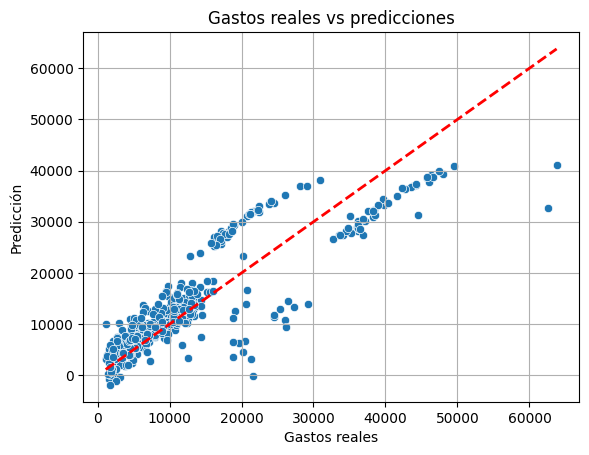

In [24]:
# Gráfica: gastos reales vs predicciones
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.grid(True)
plt.title('Gastos reales vs predicciones')
plt.xlabel('Gastos reales')
plt.ylabel('Predicción')
plt.show()

## Arboles de Decisión

Suponga ahora que se quiere desarrollar un modelo de machine learning para detectar pacientes de alto costo. La empresa considera que por encima de $15.000 son clientes de alto costo.

### Preprocesamiento

In [25]:
# Definir la variable de alto costo
datos['alto_costo'] = datos['gastos'].apply(lambda x: 1 if x > 15000 else 0)
datos['alto_costo'].value_counts()

alto_costo
0    980
1    358
Name: count, dtype: int64

In [26]:
# Dividir X y Y
X = datos.drop(['gastos','alto_costo'],axis=1)
y = datos['alto_costo']

In [27]:
# Variables dummies
X = pd.get_dummies(X, drop_first=True, dtype=int)
X.head()

,edad,hijos,imc,sexo_mujer,region_nororiente,region_suroccidente,region_suroriente,fumador_si
0,19,0,27.900,1,0,1,0,1
1,18,1,33.770,0,0,0,1,0
2,28,3,33.000,0,0,0,1,0
3,33,0,22.705,0,0,0,0,0
4,32,0,28.880,0,0,0,0,0


### División train/test

In [28]:
# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Entrenar árbol de clasificación

In [29]:
# Entrenar arbol de clasificación
modelo_dt = DecisionTreeClassifier(max_depth=3)
modelo_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
# Imprimir reglas
reglas = export_text(modelo_dt, feature_names=list(X.columns))
print(reglas)

|--- fumador_si <= 0.50
|   |--- edad <= 58.50
|   |   |--- imc <= 22.36
|   |   |   |--- class: 0
|   |   |--- imc >  22.36
|   |   |   |--- class: 0
|   |--- edad >  58.50
|   |   |--- hijos <= 0.50
|   |   |   |--- class: 0
|   |   |--- hijos >  0.50
|   |   |   |--- class: 0
|--- fumador_si >  0.50
|   |--- imc <= 22.52
|   |   |--- edad <= 26.50
|   |   |   |--- class: 0
|   |   |--- edad >  26.50
|   |   |   |--- class: 1
|   |--- imc >  22.52
|   |   |--- class: 1



Reglas para identificar pacientes de alto costo:


1.   Fumador: Si, imc > 22.52
2.   Fumador: Si, imc <= 22.52, edad > 26.5



In [31]:
# Total de pacientes en alto costo (alto_costo = 1)
datos['alto_costo'].value_counts()

alto_costo
0    980
1    358
Name: count, dtype: int64

In [32]:
# Filtrar datos con regla 1: Fumador: si, imc > 22.52
datos[(datos['fumador'] == 'si') & (datos['imc'] > 22.52)]['alto_costo'].value_counts()

alto_costo
1    250
Name: count, dtype: int64

In [33]:
# Filtrar datos con regla 2: Si, imc <= 22.52, edad > 26.5
datos[(datos['fumador'] == 'si') & (datos['imc'] <= 22.52) & (datos['edad'] > 26.5)]['alto_costo'].value_counts()

alto_costo
1    15
Name: count, dtype: int64

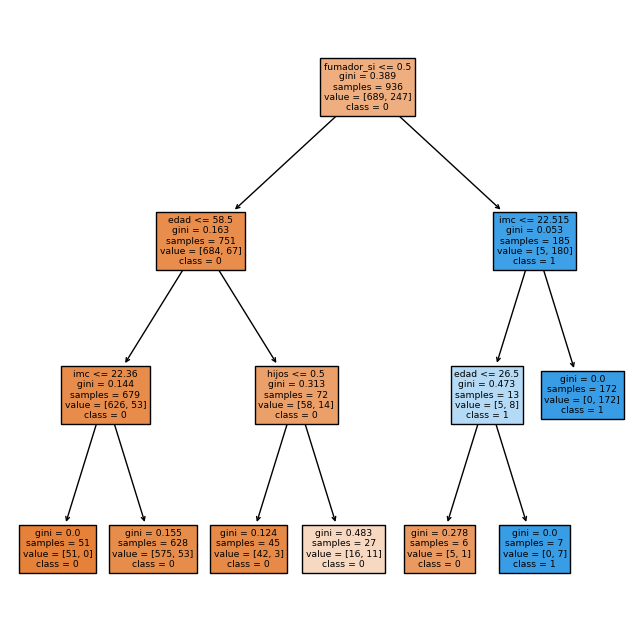

In [34]:
# Visualizar arbol de modelo_dt
fig = plt.figure(figsize=(8,8))
_ = plot_tree(modelo_dt,
              feature_names=X.columns,
              class_names=['0','1'],
              filled=True)

### Validar Arbol de Decisión

In [35]:
# Generar predicciones
y_pred = modelo_dt.predict(X_test)

In [36]:
# Comparar valor real vs predicción
predicciones = pd.DataFrame({'y_pred':y_pred, 'y_test':y_test})
predicciones

,y_pred,y_test
650,0,0
319,0,0
314,1,1
150,0,0
336,0,0
...,...,...
1221,0,0
973,0,0
1250,1,1
887,0,0


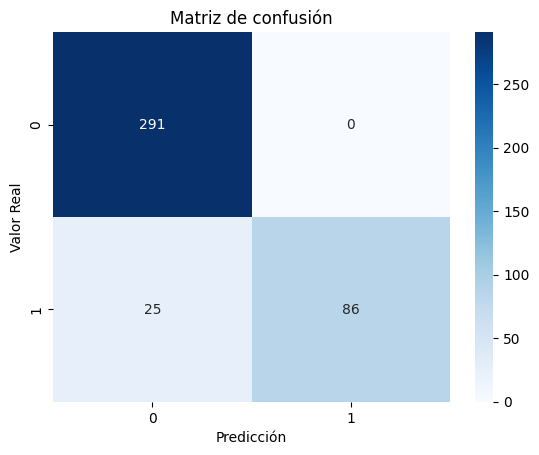

In [37]:
# Visualizar matriz de confusión

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de confusión')
plt.show()

In [38]:
# Exactitud (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud:', accuracy)

Exactitud: 0.9378109452736318


In [39]:
# Ilustración del calculo de la exactitud
predicciones_corretas = (291 + 86)
total_predicciones = (291 + 25 + 86 + 0)
predicciones_corretas / total_predicciones

0.9378109452736318

**Conclusión:** El 93.8% de las predicciones de costo alto y normal fueron correctas en el conjunto de validación (test).

In [40]:
# Precisión
precision = precision_score(y_test, y_pred)
print('Precisión:', precision)

Precisión: 1.0


In [41]:
# Ilustracción precisión
predicciones_corretas_alto = 86
total_predicciones_alto = 86 + 0
predicciones_corretas_alto / total_predicciones_alto

1.0

**Conclusión:** el 100% de las predicciones de costo alto fueron correctas en el conjunto de validación. No hubo falsos positivos.

In [42]:
# Sensibilidad (Recall)
recall = recall_score(y_test, y_pred)
print('Sensibilidad:', recall)

Sensibilidad: 0.7747747747747747


In [43]:
# Ilustración sensibilidad
predicciones_corretas_alto = 86
total_alto = 86 + 25
predicciones_corretas_alto / total_alto

0.7747747747747747

**Conclusión:** El modelo solo pudo detectar el 77.4% de los pacientes de alto costo en el conjunto de prueba. Entonces, un 22.6% de los pacientes de alto no pudo ser dectectados por modelo (falsos negativos).

### Calibración de parámetros

In [44]:
# Definir el espacio de búsqueda
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Crear el modelo
modelo_dt_cv = DecisionTreeClassifier()

# Crear el grid search para el recall
grid_search = GridSearchCV(modelo_dt_cv, param_grid, cv=5, scoring='recall')

# Entrenar el grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='recall')

In [45]:
# Imprimir el mejor parametro
grid_search.best_params_

{'max_depth': 10}

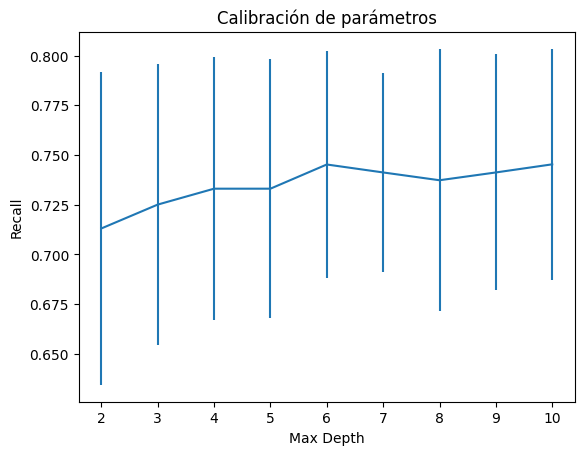

In [46]:
# Visualizar la busqueda
resultados = pd.DataFrame(grid_search.cv_results_)
resultados

# Grafica
mean_test_score = resultados['mean_test_score']
std_test_score = resultados['std_test_score']
max_depth = resultados['param_max_depth']
plt.errorbar(max_depth, mean_test_score, yerr=std_test_score)
plt.title('Calibración de parámetros')
plt.xlabel('Max Depth')
plt.ylabel('Recall')
plt.show()

### Modelo Calibrado

In [47]:
# Modelo calibrado
modelo_dt_final = DecisionTreeClassifier(**grid_search.best_params_)
# Entrenar modelo
modelo_dt_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

<Axes: >

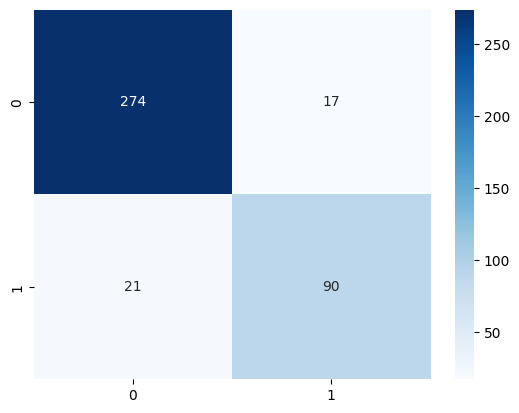

In [48]:
# Matriz de confusión
y_pred = modelo_dt_final.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [49]:
# Validar y presentar accuracy, precision y recall
accuracy_final = accuracy_score(y_test, y_pred)
precision_final = precision_score(y_test, y_pred)
recall_final = recall_score(y_test, y_pred)
print('Accuracy:', accuracy_final)
print('Precision:', precision_final)
print('Recall:', recall_final)

Accuracy: 0.9054726368159204
Precision: 0.8411214953271028
Recall: 0.8108108108108109


In [50]:
# Comparar uno a uno las métricas entre modelo vs modelo_final
print('-'*50)
print('Accuracy Inicial {}'.format(accuracy))
print('Accuracy Calibrado {}'.format(accuracy_final))
print('-'*50)
print('Precision Inicial {}'.format(precision))
print('Precision Calibrado {}'.format(precision_final))
print('-'*50)
print('Recall Inicial {}'.format(recall))
print('Recall Calibrado {}'.format(recall_final))
print('-'*50)

--------------------------------------------------
Accuracy Inicial 0.9378109452736318
Accuracy Calibrado 0.9054726368159204
--------------------------------------------------
Precision Inicial 1.0
Precision Calibrado 0.8411214953271028
--------------------------------------------------
Recall Inicial 0.7747747747747747
Recall Calibrado 0.8108108108108109
--------------------------------------------------


## Random Forest

In [51]:
# Entrenar un modelo de random forest con 200 arboles
modelo_rf = RandomForestClassifier(n_estimators=200)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

<Axes: >

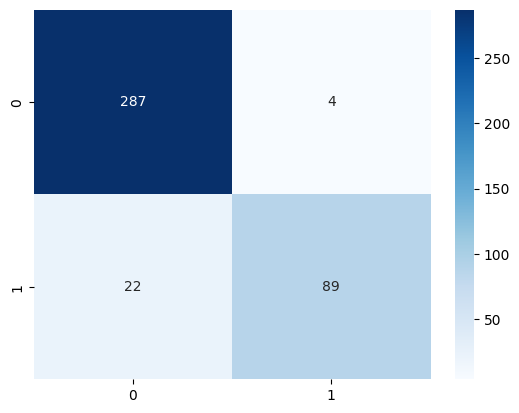

In [52]:
# Matriz de confusión random forest
y_pred = modelo_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [53]:
# Metricas modelo random forest
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)

print('Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)

Accuracy: 0.9353233830845771
Precision: 0.956989247311828
Recall: 0.8018018018018018
